## S14a: Lab 2 - Pricing, houses


### 1. Let's start by reading in our data

In [1]:
# Imports

import numpy as np
import pandas as pd

In [2]:
# Read in data with pandas

data = pd.read_csv('./data/Boston_March2018.csv')
# Preview

data.head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101


In [3]:
# View from another angle

data.iloc[100:].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
100,72253657,SLD,539000.0,530000.0,11/9/2017,3/1/2018,NaN,97,33,304 Neponset,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:--;Floor:Hardwo...,CC,Neponset,304,304,http://media.mlspin.com/photo.aspx?mls=72253657
101,72255734,SLD,829000.0,787500.0,11/15/2017,3/1/2018,NaN,20,5,73 Thaxter St,...,NaN,Foster,Hingham Middle,Hingham High,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Thaxter St,73,73,http://media.mlspin.com/photo.aspx?mls=72255734
102,72255735,SLD,1799000.0,1734300.0,11/15/2017,3/1/2018,NaN,71,71,15 Dix Street Unit 2,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Dix Street Unit 2,15,15,http://media.mlspin.com/photo.aspx?mls=72255735
103,72255807,SLD,749000.0,780000.0,11/15/2017,3/1/2018,NaN,21,6,30 Spring Lane,...,NaN,Downey,Thurston,WHS,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Spring Lane,30,30,http://media.mlspin.com/photo.aspx?mls=72255807
104,72256216,SLD,619900.0,615000.0,11/16/2017,3/1/2018,NaN,32,20,73 CIRCLE DRIVE,...,NaN,Northeast,Kennedy,Waltham,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,CIRCLE DRIVE,73,73,http://media.mlspin.com/photo.aspx?mls=72256216


### 2. Explore the data

In [4]:
# Narrow the view

prices = ['LISTPRICE', 'SOLDPRICE']
data[prices].head()


,LISTPRICE,SOLDPRICE
0,239900.0,247000.0
1,338000.0,338000.0
2,2999999.0,2950000.0
3,2600000.0,2600000.0
4,525000.0,525000.0


In [5]:
# !YOUR TURN!
# Look at sum ... argument axis=0 is for columns; argument axis=1 is for rows
print('Sum Columns\n===========\n', data[prices].sum(axis=0))

# Look at mean
print('\nMean Columns\n============\n', data[prices].mean(axis=0))

Sum Columns
 LISTPRICE    2.486085e+09
SOLDPRICE    2.464492e+09
dtype: float64

Mean Columns
 LISTPRICE    480774.491561
SOLDPRICE    476598.774637
dtype: float64


In [6]:
# Let's take a look at the property types

proptypes = data.PROPTYPE.unique()
proptypes

array(['MF', 'CC', 'SF'], dtype=object)

In [7]:
# Tinker around with some filtering options

data[(data.SOLDPRICE < 1000000) & (data.PROPTYPE == "SF")]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
5,72133120,SLD,468000.0,479000.0,3/20/2017,3/1/2018,NaN,273,273,27 Jennings Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Jennings Way,27,27,http://media.mlspin.com/photo.aspx?mls=72133120
6,72148511,SLD,209900.0,176505.0,4/19/2017,3/1/2018,NaN,311,287,26 HATHAWAY STREET,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,SF,HATHAWAY STREET,26,26,http://media.mlspin.com/photo.aspx?mls=72148511
7,72153413,SLD,549900.0,530000.0,4/26/2017,3/1/2018,NaN,261,261,9 Sheffield Place,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Sheffield Place,9,9,http://media.mlspin.com/photo.aspx?mls=72153413
9,72166889,SLD,130000.0,130000.0,5/16/2017,3/1/2018,NaN,185,185,88 Marcelle St,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Marcelle St,88,88,http://media.mlspin.com/photo.aspx?mls=72166889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,72297021,SLD,549860.0,549860.0,3/21/2018,3/28/2018,NaN,1,1,55 Goldfinch Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:--;Floor:--;App...,SF,Goldfinch Drive,55,55,http://media.mlspin.com/photo.aspx?mls=72297021
5167,72298565,SLD,97500.0,135000.0,3/26/2018,3/28/2018,NaN,0,0,15 Wood Path,...,NaN,J.R. Briggs,Overlook,Oakmont,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Wood Path,15,15,http://media.mlspin.com/photo.aspx?mls=72298565
5168,72298853,SLD,675000.0,616500.0,3/27/2018,3/30/2018,NaN,2,2,373 Bay Lane,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Bay Lane,373,373,http://media.mlspin.com/photo.aspx?mls=72298853
5169,72299954,SLD,369900.0,369000.0,3/22/2018,3/29/2018,NaN,7,4,17 Rounsevell Dr,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Rounsevell Dr,17,17,http://media.mlspin.com/photo.aspx?mls=72299954


In [8]:
# Look at everything

data.describe()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
count,5.171000e+03,5.171000e+03,5.171000e+03,0.0,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,4.064000e+03,5171.000000,0.0
mean,7.225305e+07,4.807745e+05,4.765988e+05,NaN,69.591762,48.977374,2062.584220,3.253336,2.031038,1883.277703,62.156256,4.236467e+04,0.865597,NaN
std,4.473714e+04,4.945971e+05,5.016361e+05,NaN,92.763384,68.484702,1119.135051,1.604884,1.050722,1038.769455,54.095052,3.790374e+05,0.985542,NaN
min,7.115216e+07,1.990000e+04,2.300000e+04,NaN,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,7.224754e+07,2.499000e+05,2.450000e+05,NaN,18.000000,6.000000,1747.000000,2.000000,1.500000,1191.000000,27.000000,6.000000e+03,0.000000,NaN
50%,7.226724e+07,3.748000e+05,3.700000e+05,NaN,35.000000,20.000000,2048.000000,3.000000,2.000000,1638.000000,54.000000,1.174600e+04,1.000000,NaN
75%,7.227533e+07,5.499000e+05,5.515000e+05,NaN,94.000000,73.000000,2360.000000,4.000000,2.500000,2300.000000,98.000000,2.570625e+04,2.000000,NaN
max,7.230167e+07,1.050000e+07,1.511000e+07,NaN,1562.000000,938.000000,34452.000000,32.000000,32.000000,11200.000000,1863.000000,1.868724e+07,9.000000,NaN


In [9]:
# Group by prop type

data_by_proptype = data.groupby('PROPTYPE')
data_by_proptype.describe()

MLSNUM                                                      \
           count          mean           std         min         25%   
PROPTYPE                                                               
CC        1444.0  7.225364e+07  45088.556068  71836809.0  72251477.0   
MF         484.0  7.225119e+07  47702.020613  71888962.0  72246695.0   
SF        3243.0  7.225306e+07  44125.890963  71152163.0  72246143.5   

                                              LISTPRICE                 ...  \
                 50%          75%         max     count           mean  ...   
PROPTYPE                                                                ...   
CC        72270354.0  72277153.75  72296323.0    1444.0  512072.209661  ...   
MF        72266094.5  72274428.25  72294677.0     484.0  498397.169421  ...   
SF        72265821.0  72274353.00  72301673.0    3243.0  464208.570802  ...   

         GARAGE      COOLING                               
            75%  max   count mean std min 25% 50% 75% max  
PROPTYPE                                                   
CC          1.0  2.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
MF          1.0  7.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
SF          2.0  9.0     0.0  NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 112 columns]

In [10]:
# Zoom in

data_by_proptype[['LISTPRICE', 'SOLDPRICE']].mean()

,LISTPRICE,SOLDPRICE
PROPTYPE,,
CC,512072.209661,515437.729363
MF,498397.169421,493278.811983
SF,464208.570802,456815.676056


### 3. Introducing [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [11]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# Define model

regr = linear_model.LinearRegression()


In [13]:
# Define label and features (adjustable)

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']

In [14]:
# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
#fk    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
#fk    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())


   SOLDPRICE  BEDS  BATHS  SQFT  AGE   LOTSIZE  GARAGE
0   247000.0    12    4.0  4772  118    8350.0       0
1   525000.0     3    3.0  2774   28  106286.0       2
2   479000.0     3    2.5  2000    1   30000.0       2
3   176505.0     2    1.0     0    0       0.0       0
4   530000.0     3    2.5  2639   15   18730.0       2


In [15]:
# Extract features and label

label = filter_data[label]
features = filter_data[features]


In [16]:
# !YOUR TURN!

# Take a look at the shapes for 'labels' and 'features'
print('Features Shape:', features.shape) #  n rows and m columns
print('Label Shape:', label.shape) #  n rows and 1 column

Features Shape: (3838, 6)
Label Shape: (3838, 1)


In [17]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.25)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(959, 6) (959, 1)

Test shape
(2879, 6) (2879, 1)


In [18]:
# Fit training sets

regr.fit(features_train, label_train)


LinearRegression()

In [19]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: 0.29


### 4. Plot, aka "Visualize"

In [20]:
# Import
import matplotlib.pyplot as plt

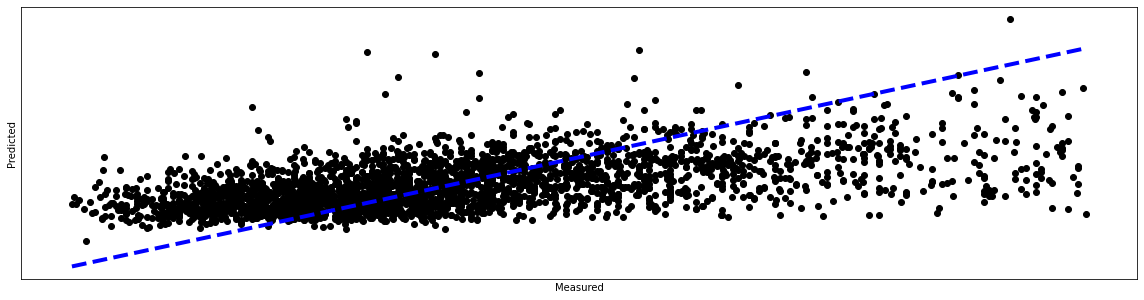

In [21]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

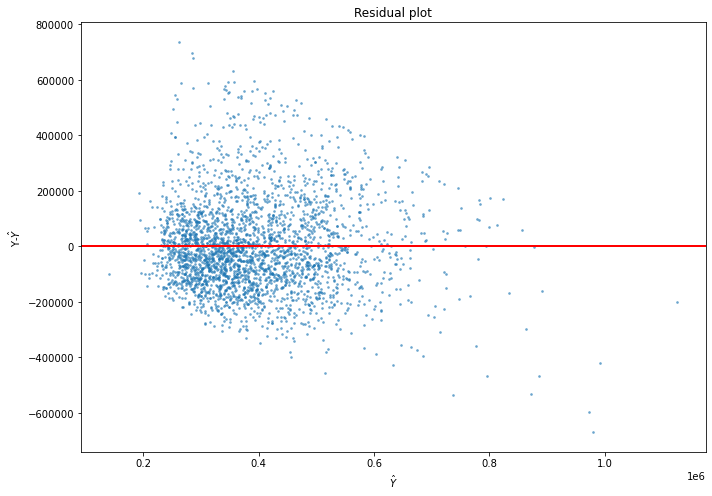

In [22]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [23]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr.pkl')

['regr.pkl']

# HOMEWORK 1

### 6. Train Test Split

In [24]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split


In [25]:
# Init x, y test,train @ 33% size (sklearn)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)



In [26]:
# Determine linear_model (sklearn - above))
model_regr = linear_model.LinearRegression()


In [27]:
# Train linear_model (sklearn)
model_regr.fit(X_train, y_train)


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

y_pred = model_regr.predict(X_test)
score = model_regr.score(features, label)
print('Score: %.2f' % score)

# Score Method 2 (sklearn)
print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [ ]:
# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Download model as pkl file
joblib.dump(regr, 'model_regr.pkl')


### 7. Decision Tree

In [ ]:
# YOUR TURN
# Run DecisionTreeRegressor
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


# Create regressor
from sklearn.tree import DecisionTreeRegressor

#Init model
model_dtree_regr = DecisionTreeRegressor(random_state=0) # experiement with values: max_depth=5

# Fit
model_dtree_regr.fit(X_train, y_train)

# Predictions
y_dtr_pred = model_dtree_regr.predict(X_test)
print('Decision Tree Regressor Pred: ', y_dtr_pred)


In [ ]:
# Score

score_dtr = model_dtree_regr.score(features, label)
print('Score: %.2f' % score_dtr)

# Score Method 2 (sklearn)
print('Variance score: %.2f' % r2_score(y_test, y_dtr_pred))


In [ ]:
# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(y_test, y_pred, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
# Download model as pkl file
joblib.dump(model_dtree_regr, 'model_dtree_regr.pkl')


In [ ]:
model1 = joblib.load('model_regr.pkl')
model2 = joblib.load('model_dtree_regr.pkl')
# Make prediction - features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']
pred1 = model1.predict([[4, 2.5, 3005, 15, 17903.0, 1]])[0][0].round(2)
pred2 = model2.predict([[4, 2.5, 3005, 15, 17903.0, 1]])[0].round(6)
res = "Linear Regression: "+str(pred1) + "\nDecision Tree Regressor: "+str(pred2)
print(res)

### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame